# Liver Disease Prediction

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [2]:
df=pd.read_csv("C:/Users/khushi saxena/Desktop/QuadraDiag/Dataset/liver.csv")
print("Shape of the Dataset",df.shape)
df.head()

Shape of the Dataset (583, 11)


,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [3]:
df['is_patient'].value_counts()


1    416
0    167
Name: is_patient, dtype: int64

In [4]:
# Gender feature:
print("Total Male   :", df['gender'].value_counts()[0])
print("Total Female :", df['gender'].value_counts()[1])

Total Male   : 441
Total Female : 142


In [5]:
# Label Encoding
df['gender'] = np.where(df['gender']=='Male', 1,0)

In [6]:
df

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,0
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [7]:
#Checking for the null value 
df.isnull().values.any()

True

In [8]:
df.isnull().sum()

age                 0
gender              0
tot_bilirubin       0
direct_bilirubin    0
tot_proteins        0
albumin             0
ag_ratio            0
sgpt                0
sgot                0
alkphos             4
is_patient          0
dtype: int64

In [9]:
df1=df.fillna(value=0)

In [10]:
#separating the dataset
feature= ['age','gender','tot_bilirubin','direct_bilirubin','tot_proteins','albumin','ag_ratio','sgpt','sgot','alkphos']
predicted= ['is_patient']

X = df1[feature].values
y = df1[predicted].values
print("Shape of Feature and predicted column")
print(X.shape,y.shape)

Shape of Feature and predicted column
(583, 10) (583, 1)


([<matplotlib.patches.Wedge at 0x1a5b669b310>,
 [Text(-0.8615961737861958, -0.6838508852937075, 'Patient'),
  Text(0.8615961097594514, 0.68385096596216, 'Not Patient')],
 [Text(-0.46996154933792494, -0.37300957379656774, '71.4%'),
  Text(0.46996151441424616, 0.37300961779754177, '28.6%')])

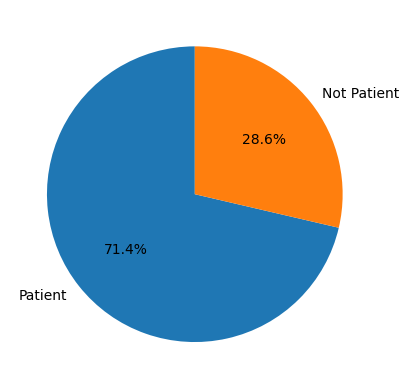

In [11]:
plt.pie(df['is_patient'].value_counts(), labels=['Patient','Not Patient'], autopct='%1.1f%%', startangle=90)

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'tot_bilirubin'}>],
       [<AxesSubplot:title={'center':'direct_bilirubin'}>,
        <AxesSubplot:title={'center':'tot_proteins'}>,
        <AxesSubplot:title={'center':'albumin'}>],
       [<AxesSubplot:title={'center':'ag_ratio'}>,
        <AxesSubplot:title={'center':'sgpt'}>,
        <AxesSubplot:title={'center':'sgot'}>],
       [<AxesSubplot:title={'center':'alkphos'}>,
        <AxesSubplot:title={'center':'is_patient'}>, <AxesSubplot:>]],
      dtype=object)

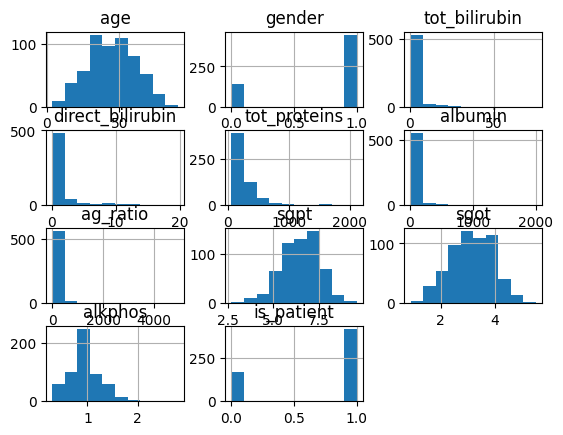

In [12]:
df.hist()

### Splitting the dataset for Training and Testing

In [13]:
#from Scikit-Learn is a pyhon library for machine learning in which we have set of pre defined Algorithms.
from sklearn.model_selection import train_test_split  #used for splitting the data into training and testing 
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=.25,random_state=42)

#In this i have splitted the dataset for train and test.75% data is splitted for Training and 35% data for Testing the perfrmance of our model.

In [14]:
#shape of train and test datasets
Xtrain.shape,Xtest.shape,ytrain.shape,ytest.shape

((437, 10), (146, 10), (437, 1), (146, 1))

### Creating the Model using Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression #algorithm for training the data


logi=LogisticRegression(random_state=42)
logi.fit(Xtrain,ytrain)

In [16]:
#shape of train and test datasets
Xtrain.shape,Xtest.shape,ytrain.shape,ytest.shape

((437, 10), (146, 10), (437, 1), (146, 1))

### Accuracy Score

In [17]:
from sklearn.metrics import accuracy_score #used for finding the accuracy score

#Accuracy Score of Training Data
x_pred1 = logi.predict(Xtrain)
train_accuracy=accuracy_score(x_pred1,ytrain)
print("Accuracy Score of Train Data",train_accuracy)

#Accuracy Score of Testing Data
x_pred2 = logi.predict(Xtest)
test_accuracy=accuracy_score(x_pred2,ytest)
print("Accuracy Score of Test Data",test_accuracy)

Accuracy Score of Train Data 0.7093821510297483
Accuracy Score of Test Data 0.7191780821917808


### Creating the Pickle File

In [18]:
import pickle
pickle.dump(logi,open("liver.pkl",'wb'))

### Accuracy of Model is 71% here we have used Logistic Regression and taken dataset from Kaggle


Here our dataset has 10 values to be entered by users


We have splitted our dataset of ration 75:35 and used standard random state value for better accuracy